In [1]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import time
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score


In [2]:
def clean_email(text: str) -> str:
    text = re.sub(r'<[^>]+>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    # TODO: add a count of URLs to email data
    text = re.sub(r'\d+', '', text) # remove numerical text
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.lower().strip() # lowercase
    return text

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    """
    """
    df['clean_email'] = df['body'].astype(str).apply(clean_email)
    return df

In [3]:
df = pd.read_csv('../../data/analysis/emails_augmented.csv') 
assert 'body' in df.columns and 'label' in df.columns, "Missing required columns."
df = preprocess(df)
X = df['clean_email']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
LogisticRegression_pipeline = joblib.load('../../output/models/LogisticRegression.joblib')
MLPClassifier_pipeline = joblib.load('../../output/models/MLPClassifier.joblib')
MultinomialNB_pipeline = joblib.load('../../output/models/MultinomialNB.joblib')
RandomForest_pipeline = joblib.load('../../output/models/RandomForest.joblib')

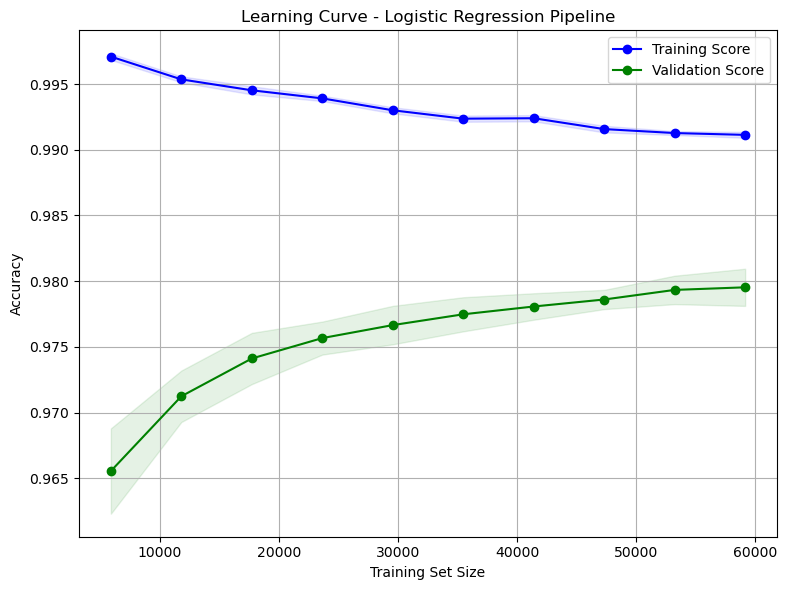

In [21]:
#Logistic Regression Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= LogisticRegression_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=16
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/LogisticRegression_learning_curve.png', dpi=300)
plt.show()

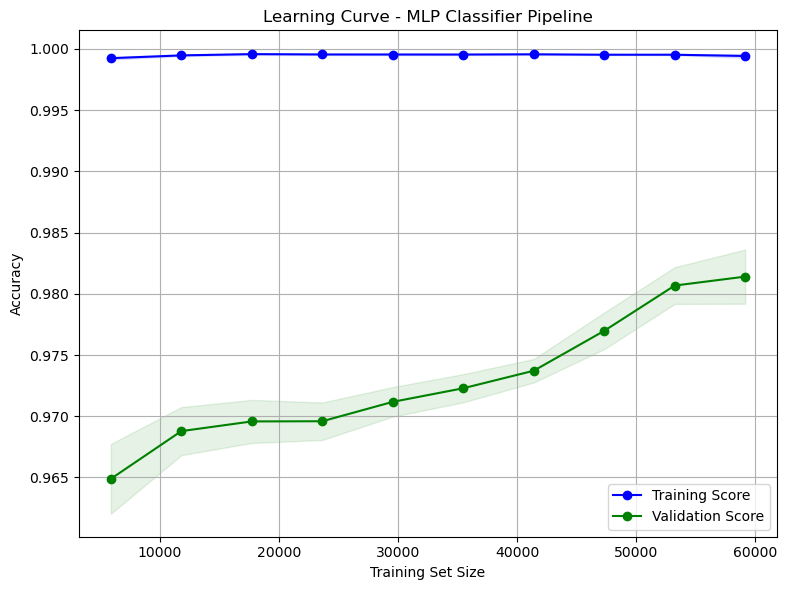

In [24]:
#MLP Classifier Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= MLPClassifier_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=16
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - MLP Classifier Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/MLPClassifier_learning_curve.png', dpi=300)
plt.show()

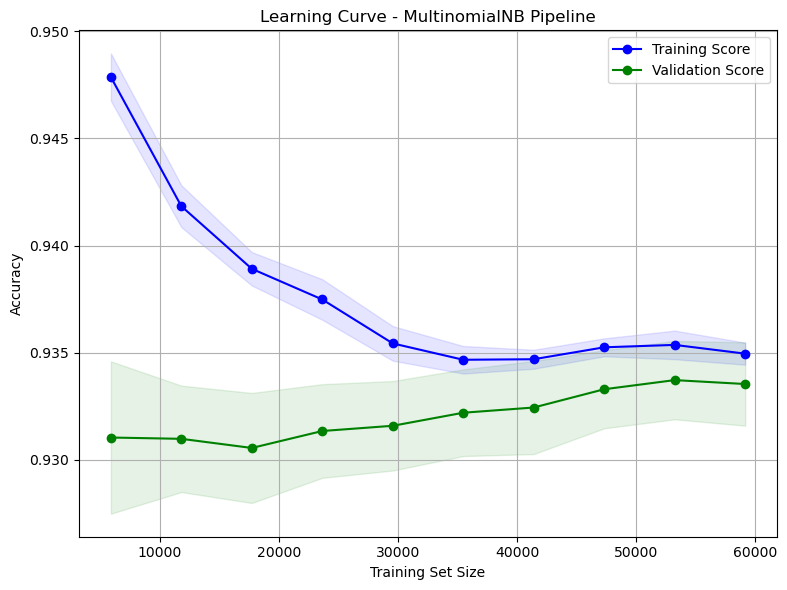

In [25]:
#MultinomialNB Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= MultinomialNB_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=16
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - MultinomialNB Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/MultinomialNB_learning_curve.png', dpi=300)
plt.show()

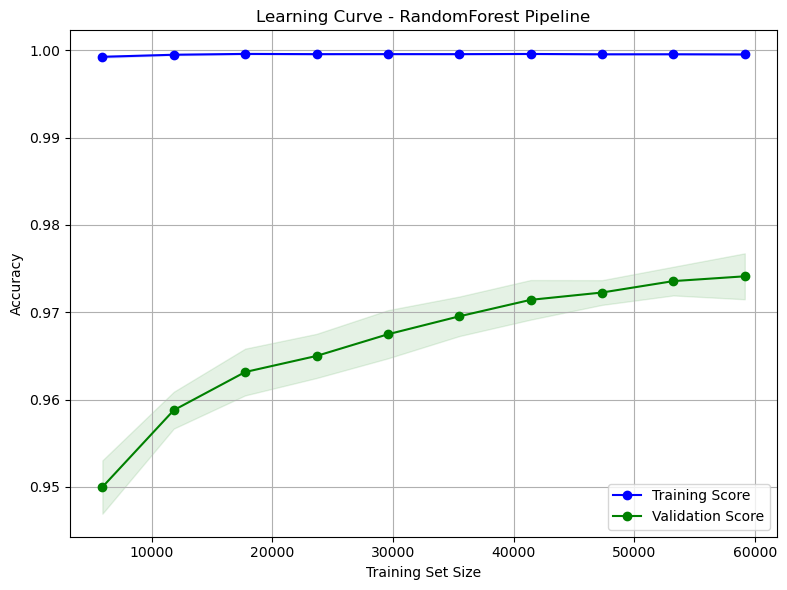

In [17]:
#RandomForest Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= RandomForest_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=16
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - RandomForest Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/RandomForest_learning_curve.png', dpi=300)
plt.show()

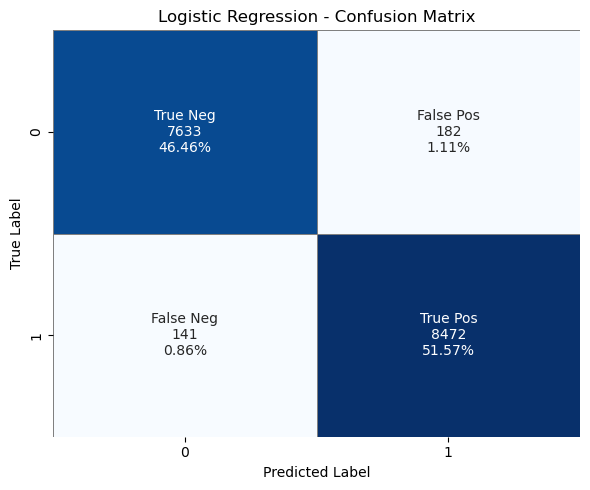

In [19]:
import seaborn as sns
#Logistic Regression Confusion Matrix
y_pred = LogisticRegression_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/LogisticRegression_confusion_matrix.png', dpi=300)
plt.show()

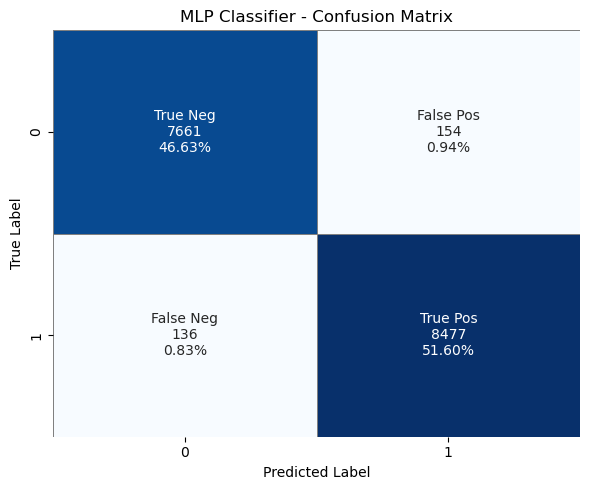

In [20]:
#MLP Classifier Confusion Matrix
y_pred = MLPClassifier_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("MLP Classifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/MLPClassifier_confusion_matrix.png', dpi=300)
plt.show()

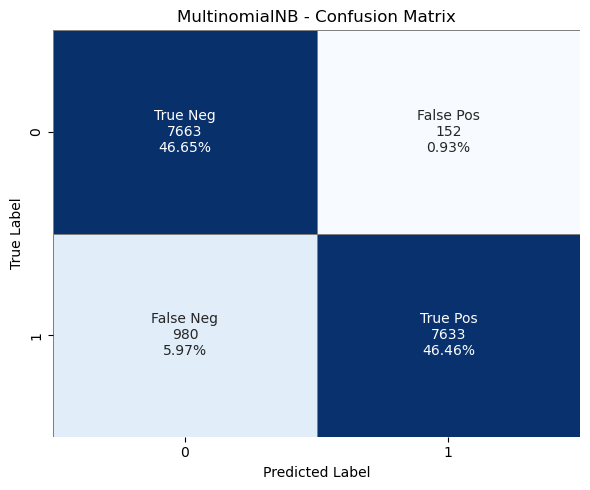

In [21]:
#MultinomialNB Confusion Matrix
y_pred = MultinomialNB_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("MultinomialNB - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/MultinomialNB_confusion_matrix.png', dpi=300)
plt.show()

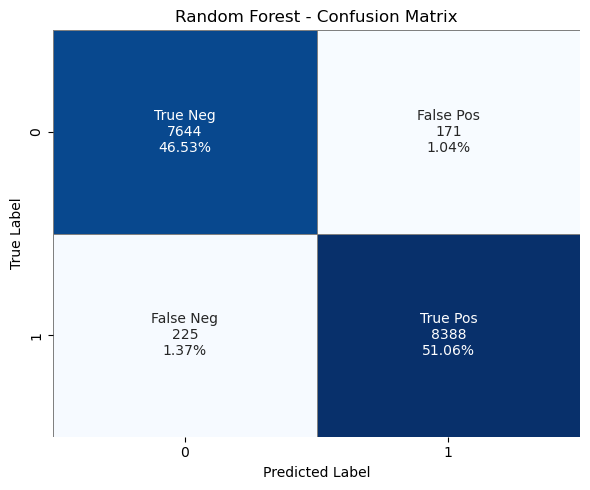

In [22]:
#RandomForest Confusion Matrix
y_pred = RandomForest_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/RandomForest_confusion_matrix.png', dpi=300)
plt.show()

In [5]:
results = []
pipelines = {
    "Logistic Regression": LogisticRegression_pipeline,
    "Multinomial Naive Bayes": MultinomialNB_pipeline,
    "MLP Classifier": MLPClassifier_pipeline,
    "Random Forest": RandomForest_pipeline
}

for name, pipe in pipelines.items():
    print(f"Training {name}...")
    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, 'predict_proba') else None
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1 Score": f1_score(y_test, y_pred, average='binary'),
        "ROC-AUC": roc,
        "Training Time (s)": round(end - start, 2)
    })

# Show results
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
df_results.to_csv("../../output/results/model_comparison_results.csv", index=False)
print(df_results)



Training Logistic Regression...
Training Multinomial Naive Bayes...
Training MLP Classifier...
Training Random Forest...
                     Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
2           MLP Classifier  0.982347   0.982157  0.984210  0.983183  0.997909   
0      Logistic Regression  0.980338   0.978969  0.983629  0.981294  0.997527   
3            Random Forest  0.975408   0.980339  0.972600  0.976454  0.996905   
1  Multinomial Naive Bayes  0.931093   0.980475  0.886219  0.930967  0.991672   

   Training Time (s)  
2             199.80  
0              19.70  
3             280.61  
1              17.57  
